# Storytelling Daily Exchange Rates

**Objective :** The goal of this project is to visualize the Euro-Dollar daily exchange rates between for the years 2017 - 2020 and particlarly compare the exchange rate trend during the $\color{RED}{\text{Global Pandemic}}$ period of 2020 with the previous years.

**Source of Data :** The data used is being sourced from European Central Bank.
$\color{RED}{\text{Note:}}$ the datasets gets regular updates - we downloaded it on January 2021

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Let's start by reading in the dataset.

In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt,matplotlib.dates as mdates,matplotlib.gridspec as gridspec,matplotlib.ticker as NullLocaotr
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullLocator


In [2]:
exchange_rates = pd.read_csv('CSV FILES/euro-daily-hist_1999_2020.csv')

exchange_rates

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
5874,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

In [4]:
exchange_rates.describe()

,[Iceland krona ],[Romanian leu ],[Turkish lira ]
count,3471.000000,5816.000000,5816.000000
mean,103.330651,3.900097,2.905851
std,33.482430,0.867975,2.204553
min,68.070000,1.291200,0.370100
25%,82.305000,3.523325,1.701750
50%,88.210000,4.234100,2.137550
75%,125.360000,4.500800,3.234400
max,305.000000,4.950600,10.565000


### Data Cleaning

We will only focus on the relationship between the euro and the US dollar, therefore we will only work with the columns 'Period \ Unit:' and '[US Dollar]'.

We will start by renaming both columns, then we'll convert their values; after that, we sort in ascending order by column 'Time' and finally reset the table index:

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                              'Period\\Unit:': 'Time'},
                     inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

exchange_rates.sort_values('Time', inplace=True)

exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.head()

,Time,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],US_dollar,[South African rand ]
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855


We observe that in the column **'US_dollar'** there are 62 records whose values are equal to **'-'**. We'll only keep the numeric values.

In [6]:
euro_to_dollar = exchange_rates.copy()[['Time',
                                       'US_dollar']]

euro_to_dollar.US_dollar.value_counts(dropna=False)

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.0761     1
1.3966     1
0.8494     1
1.0065     1
0.9745     1
Name: US_dollar, Length: 3576, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5816 non-null   datetime64[ns]
 1   US_dollar  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


### Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

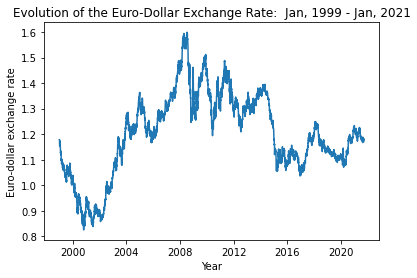

In [8]:
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title("Evolution of the Euro-Dollar Exchange Rate:  Jan, 1999 - Jan, 2021")
plt.xlabel("Year")
plt.ylabel("Euro-dollar exchange rate")
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

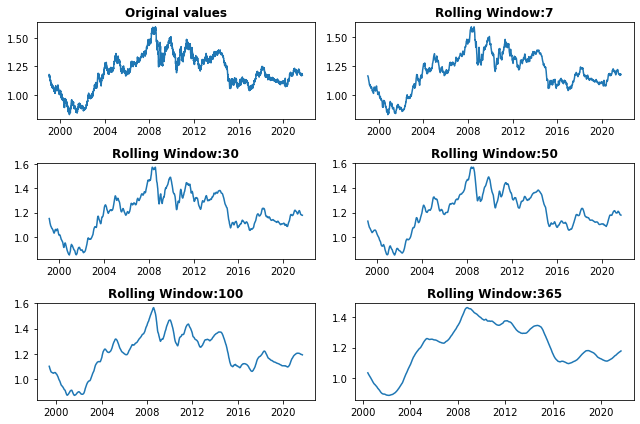

In [9]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots.
plt.show()


We'll calculate the rolling means for the 'US_dollar' column using a moving window of 30 days. Then, we'll add the rolling means to a new column named 'rolling_mean'. This operation increases the data-ink ratio.

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.head(60)

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


### Coming up with an Idea

Our goal is to create a narrative data visualization using the data we have. To create a story, we must organize our data into a series of events that show changes.

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. 

- We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

### Impact of the Coronavirus Pandemic on the US Dollar

Next, we will show how the euro-dollar rate has changed during the coronavirus pandemic. We know that the pandemic arrived in the United States in January 2020; therefore, we will show the 2020 data (through January 2021) and compare it to the 2017-2019 data as a baseline.

In [11]:
before_pandemic = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year <= 2019)]
pandemic_2020 = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2020]

<ipython-input-34-ce9946bd58d8>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['2017', '', '', '2018', '', '', '2019', '', '', '2020'], fontsize=12, alpha=0.3)
<ipython-input-34-ce9946bd58d8>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['FM1', '', 'FM2', '', 'FM3', '', '2021'], fontsize=12, alpha=0.3)


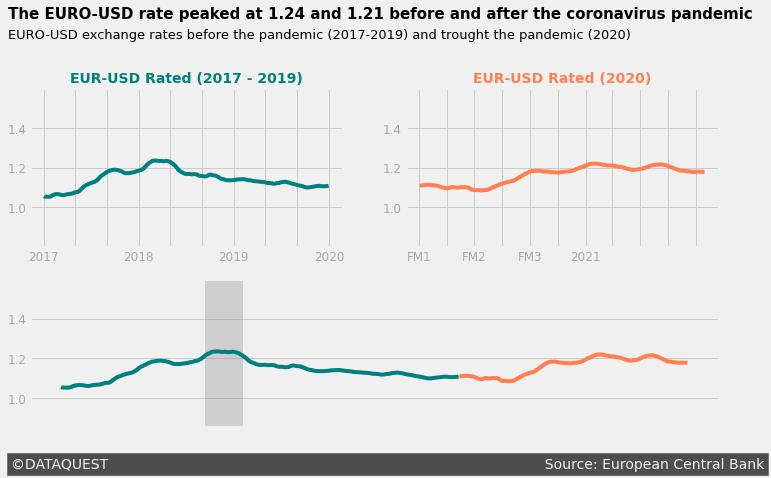

In [34]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the subplots
fig = plt.figure(figsize=(11, 6))
fig.tight_layout()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2)
axes = [ax1, ax2, ax3]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.6)
    ax.set_yticks([1.0, 1.2, 1.4])
    ax.set_yticklabels(['1.0', '1.2','1.4'], fontsize=12, alpha=0.3)

### Ax1: Before pandemic 2017-2019
ax1.plot(before_pandemic['Time'], before_pandemic['rolling_mean'], color='teal')
ax1.set_xticklabels(['2017', '', '', '2018', '', '', '2019', '', '', '2020'], fontsize=12, alpha=0.3)
ax1.set_title('EUR-USD Rated (2017 - 2019)', fontsize=14, weight='bold', color='teal')
   
### Ax2: coronavirus pandemic 2020
ax2.plot(pandemic_2020['Time'], pandemic_2020['rolling_mean'], color='coral')
ax2.set_xticklabels(['FM1', '', 'FM2', '', 'FM3', '', '2021'], fontsize=12, alpha=0.3)
ax2.set_title('EUR-USD Rated (2020)', fontsize=14, weight='bold', color='coral')

### Ax3: Merge both times
ax3.plot(before_pandemic['Time'], before_pandemic['rolling_mean'], color='teal')
ax3.plot(pandemic_2020['Time'], pandemic_2020['rolling_mean'], color='coral')
ax3.axvspan(xmin=17565, xmax=17665, ymin=0.08, alpha=0.3, color='grey') # Highlihting the peak before coronavirus pandemic
ax3.set_xticks([])

### Adding a title and a subtitle
ax1.text(17030, 1.95, 'The EURO-USD rate peaked at 1.24 and 1.21 before and after the coronavirus pandemic', fontsize=15, weight='bold')
ax1.text(17030, 1.85, 'EURO-USD exchange rates before the pandemic (2017-2019) and trought the pandemic (2020)', fontsize=13)

### Adding a signature
ax3.text(17030, 0.65, '©DATAQUEST' + ' ' * 97 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)

plt.show()

In [16]:
euro_to_dollar['year'] = euro_to_dollar.Time.dt.year
euro_to_dollar.year.value_counts(dropna=False)

2004    259
1999    259
2010    258
2011    257
2016    257
2020    257
2005    257
2008    256
2012    256
2015    256
2009    256
2019    255
2013    255
2000    255
2017    255
2002    255
2006    255
2014    255
2018    255
2003    255
2007    255
2001    254
2021    184
Name: year, dtype: int64

In [17]:
plt.style.use('fivethirtyeight')

In [18]:
df_select = euro_to_dollar.copy()[
    euro_to_dollar['year'].isin(
        [2017,2018,2019,2020])]

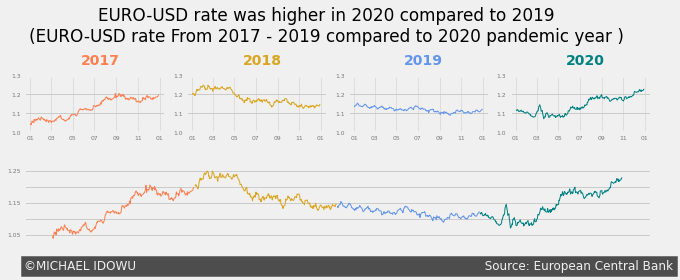

In [39]:
year = [2017,2018,2019,2020]

color = ['Coral','GoldenRod','CornflowerBlue','Teal']

#adjust the width ratios of  different axis object
# columns and height ratios of the rows

width = [1,1,1,1]
height = [1,1.7]

gs_kw = dict(width_ratios = width, 
             height_ratios = height)

fig, axs = plt.subplots(nrows=2,ncols=4,
                         figsize=(10,3),
                       gridspec_kw = gs_kw
                       ) #constrained_layout
                                            # to spread out the axes object

#create a new subplot with requred dimension using gridspec
gs = axs[1,0].get_gridspec()

for ax in axs[1,0:]:
    ax.remove()
ax5 = fig.add_subplot(gs[1,0:])

for yr,ax,n,c in zip(year[:4],axs.reshape(-1),
                     range(4),color):
    
    yr_df =euro_to_dollar[euro_to_dollar.year == yr]
    time= yr_df['Time']
    us_dollar = yr_df['US_dollar']
    roll_m = yr_df['rolling_mean']
    
    ax.plot(time, us_dollar,c = c,linewidth=1)
        
    # adjusting the x-axis locator for datetime dtype
        
    years= mdates.YearLocator()
    months= mdates.MonthLocator(interval=2)
    y = NullLocator() # helps to hide ticks
        
    # strftime datetype
    my_fmt = mdates.DateFormatter('%b-%y') 
    minor_fmt= mdates.DateFormatter('%m')
        
    ax.xaxis.set_major_formatter(my_fmt)
    ax.xaxis.set_minor_formatter(minor_fmt)
        
    ax.xaxis.set_major_locator(y) #use the NullLocator
                                  # to hide the major ticks
    
    ax.xaxis.set_minor_locator(months)
    ax.set_yticks([1.0,1.1,1.2,1.3])
    
    ax.set_ylim([1, 1.3])
        
    ax.xaxis.grid(True, which='minor', alpha=.5) #display
                                # the minor grid line
        
    ax.text(s=str(yr), y = 1.2, x = 0.4,transform =
            ax.transAxes,
            weight='bold', color=c
           ) # ax.transAxes helps to 
                        # select x-coord postion for
                        # datetime dtype


    ax.tick_params(labelsize= 6)
    for y_ in ax.get_yticklabels():
        y_.set_alpha(.5)
        
    for l in ax.get_xminorticklabels():
        l.set_fontsize(6)
        l.set_alpha(.5)

#     ax.get_xaxis().set_tick_params(which='major',
#                                pad=7)  
#                             #move the major 
#                             #  tick down
            
    
for yr_,c_ in zip(year,color):
    df=df_select[df_select.year== yr_]
    ax5.plot(df['Time'],df['US_dollar'], c =c_,
            linewidth=1)
ax5.xaxis.grid(False)
ax5.tick_params(labelbottom=False,labelsize=6)

ax5.set_yticks([1.05,1.1,1.15,1.2,1.25]) # must set yticks
                                        # before setting yticklabels
ax5.set_yticklabels(['1.05','','1.15','','1.25'])

for t_ in ax5.get_yticklabels():
    t_.set_alpha(.5)
    
ax5.set_ylim([1,1.3])

ax5.text(x=0, y=-0.2,s='©MICHAEL IDOWU'+' '*90 +
         'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=12, transform= ax5.transAxes)

# to adjust the space between axs objects.

fig.subplots_adjust(wspace=0.15,hspace=0.3)


plt.suptitle(x=0.5,y=1.2,
             t=
'EURO-USD rate was higher in 2020 compared to 2019'+'\n'+
'(EURO-USD rate From 2017 - 2019 compared to 2020 pandemic year )')

plt.show()

### Conclusion

- In the chart prior to the coronavirus pandemic, we can see that the Euro-USD exchange rate fluctuates upward since the second four-mounth of 2017, reaching its highest peak (1.24 approximately) in the first four-mounth of 2018.
- After that time period, we see a uniform decline until the end of the first four-mounth of 2020. From there, we appreciate a steady upward movement; even until January 2021.
- Overall, euro-dollar exchange rates increased mainly in 2020, which may be due to the recession caused by the coronavirus pandemic.